In [1]:
#importing packages
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from plotnine import ggplot, geom_boxplot, geom_density, geom_bar, geom_point, geom_line, aes, labs



In [3]:
#Part one: Data Exploration
#Importing data
Data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
Data.head()
#first thing I notice is that Sex, and smoker will need to be dummified 

Data["sex"].value_counts()
#Only male and female recorded, no NA
Data["smoker"].value_counts()
#Only yes and no, no NA
Data.describe()



,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


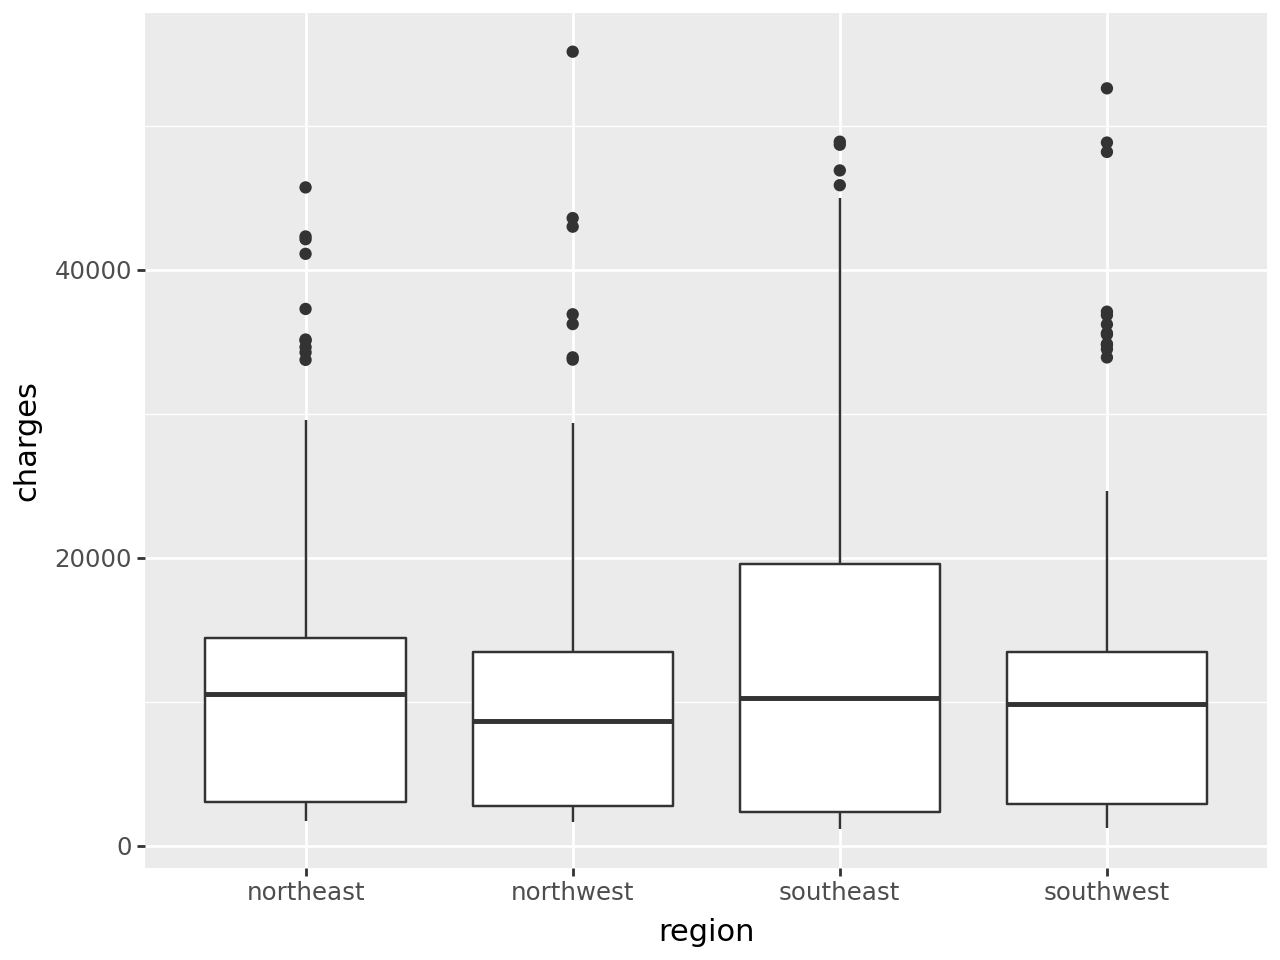

In [4]:
(ggplot(Data, aes(x = "region", y = "charges")) + geom_boxplot())

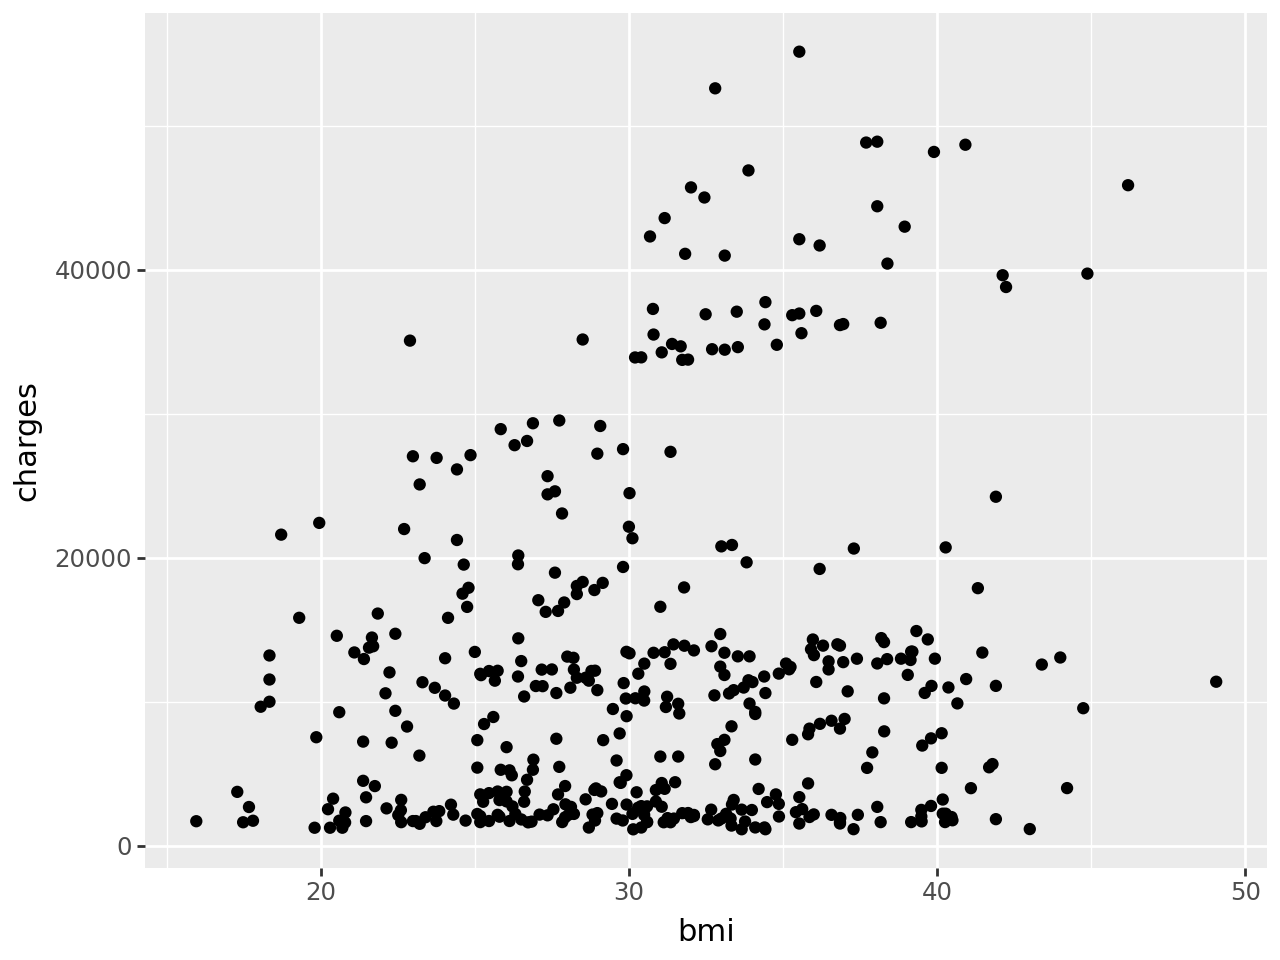

In [5]:
(ggplot(Data, aes(x= "bmi", y = "charges")) + geom_point())

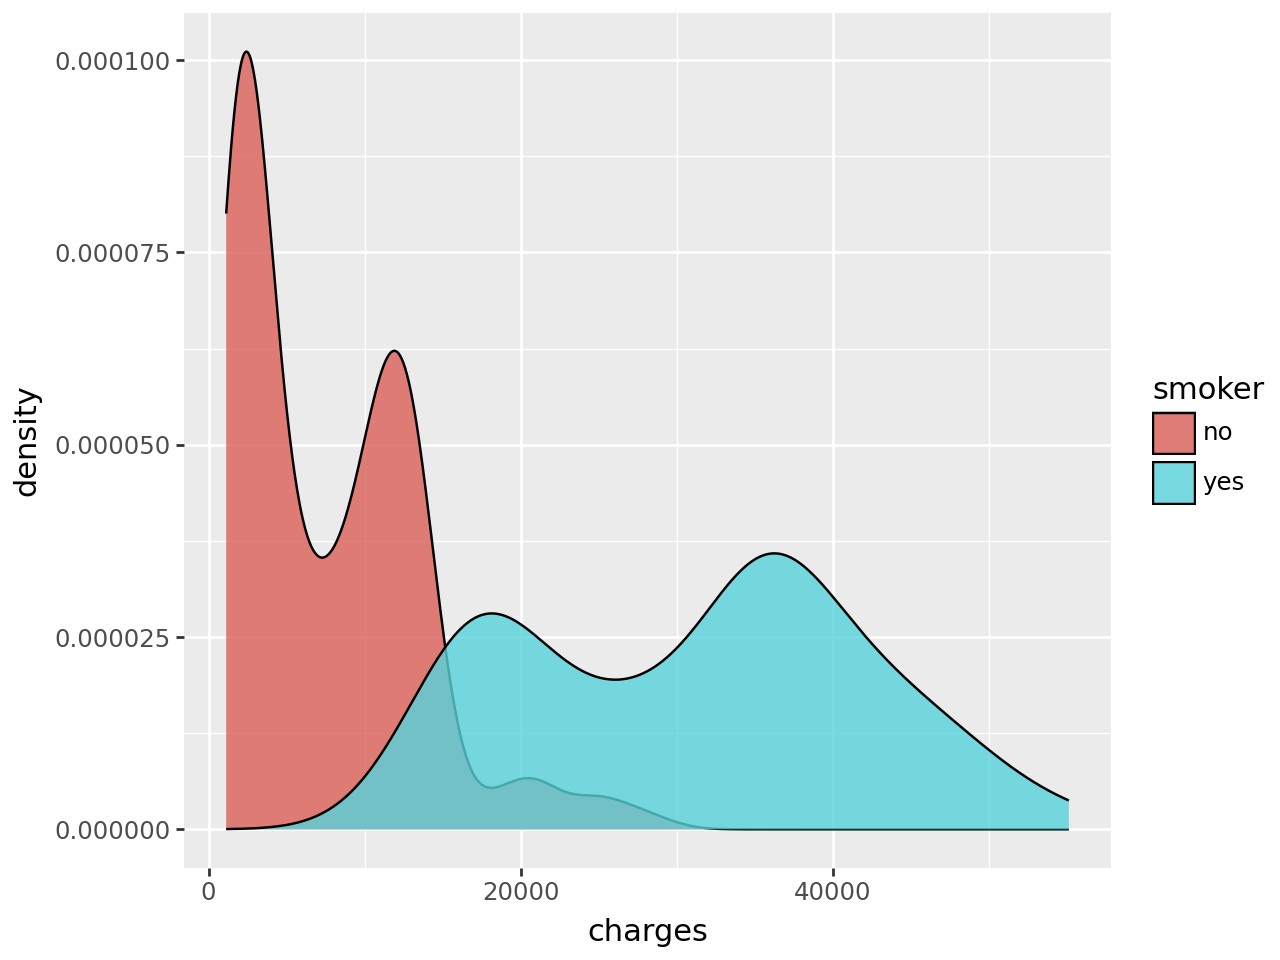

In [6]:
(ggplot(Data, aes(x= "charges", fill = "smoker")) + geom_density(alpha = 0.8))

Non smokers seem to have a much lower density of charges

**Simple Linear Models**


In [7]:
#Making X and y, test and train splits

X = Data[["age", "bmi", "smoker", "sex", "region"]]
y = Data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

Model 1:
***age as predictor for charges***

In [8]:
#preprocessing
ct1 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(None), ["age"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model1_pipeline = Pipeline(
    [("preprocessing", ct1),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model1 = model1_pipeline.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)


C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [9]:
#coeffecient estimates
model1.named_steps["linear_regression"].coef_
#The coeffecient of 231.42 means that according to this model, with every year increase of age, there is an average of 231.42 dollars in insurance charges


array([206.56281465])

In [10]:
#r2 values
r2_1 = r2_score(y_test, y_pred_model1)
#0.0911

In [11]:
#MSE 
mse_test1 = mean_squared_error(y_test, y_pred_model1)
mse_train1 = mean_squared_error(y_train, model1.predict(X_train))
print(mse_test1, mse_train1)

105390214.78442837 134189065.021311
105390214.78442837 134189065.021311


The r2 score adn MSE suggest the fit for these models is very, very bad

Model 2:
***age and sex as predictor for charges***

In [12]:
#preprocessing
ct2 = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output= False, drop = "first"), ["sex"]),
        ("keep", FunctionTransformer(None), ["age"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model2_pipeline = Pipeline(
    [("preprocessing", ct2),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model2 = model2_pipeline.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)


C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [52]:
# ct2.fit_transform(X_train)

In [13]:
#coeffecient estimates
model2.named_steps["linear_regression"].coef_
#The coeffecients of 221.45, and 231.23 with this model mean that if someone is a male they have on average 221 more dollars of insurance charges,
#  and with every year increase of age, there is an average of 231 dollars in insurance charge

array([1475.53469229,  204.39641927])

In [14]:
#r2 values
r2_score(y_test, y_pred_model2)
#0.0925

0.1305141065824642

In [15]:
#MSE 
mse_test2 = mean_squared_error(y_test, y_pred_model2)
mse_train2 = mean_squared_error(y_train, model2.predict(X_train))
print(mse_test2, mse_train2)

107361218.00031449 133647936.05787583
107361218.00031449 133647936.05787583


Model 3:
***age and smoker as predictor for charges***

In [16]:
#preprocessing
ct3 = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output= False, drop = "first"), ["smoker"]),
        ("keep", FunctionTransformer(None), ["age"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model3_pipeline = Pipeline(
    [("preprocessing", ct3),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model3 = model3_pipeline.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)

C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [17]:
#coeffecient estimates
model3.named_steps["linear_regression"].coef_
#The coeffecients of 24219.6, and 240.36 with this model mean that if someone is a male they have on average 24219 more dollars of insurance charges,
#  and with every year increase of age, there is an average of 240 dollars in insurance charge

array([24445.93510724,   258.87208866])

In [18]:
#r2 values
r2_score(y_test, y_pred_model3)
#0.75

0.7203052515637551

In [19]:
#MSE 
mse_test3 = mean_squared_error(y_test, y_pred_model3)
mse_train3 = mean_squared_error(y_train, model3.predict(X_train))
print(mse_test3, mse_train3)

34535774.63158093 33496059.746514294
34535774.63158093 33496059.746514294


The third predictive model seems to be by far the best predictive model for this dataset. The R squared value is much better than the first and second models (.75 compared to .091, and .093 respectively). The MSE on both the test and train data is also much better. The train and test MSE are also both trending towards 0, which inidcates there is not overfitting

**Multiple Linear Models**

Model 4:
***age and bmi as predictors for charges***

In [20]:
#preprocessing
ct4 = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"]) #standardize the predictor variables so we can compare their effect
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model4_pipeline = Pipeline(
    [("preprocessing", ct4),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model4 = model4_pipeline.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)


In [81]:
# ct4.fit_transform(X_train)

In [21]:
#coeffecient estimates
model4.named_steps["linear_regression"].coef_
#The coeffecients of 3596, and 1762 with this model mean that for every standard deviation increase in age
#  there is an average of 3596 more insurance charges and 
#  and with every year increase of age, there is an average of 240 dollars in insurance charge

array([3162.05646893, 2095.79237787])

In [22]:
#r2 values
r2_4 = r2_score(y_test, y_pred_model4)
#0.109

In [23]:
#MSE 
mse_test4 = mean_squared_error(y_test, y_pred_model4)
mse_train4 = mean_squared_error(y_train, model4.predict(X_train))
print(mse_test4, mse_train4)

106966202.36813982 129864466.13452475
106966202.36813982 129864466.13452475


The r squared and MSE values are better than the values from model 1

Model 5
***age and age^2 as predictors***

In [24]:
#preprocessing
ct5 = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model5_pipeline = Pipeline(
    [("preprocessing", ct5),
    ("polynomial", PolynomialFeatures(degree= 2, include_bias= False)), 
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model5 = model5_pipeline.fit(X_train, y_train)
y_pred_model5 = model5.predict(X_test)


In [25]:
model5.named_steps["linear_regression"].coef_

array([3594.51867819, -954.11110116])

In [26]:
#r2 values
r2_5 = r2_score(y_test, y_pred_model5)
#0.089

In [27]:
mse_test5 = mean_squared_error(y_test, y_pred_model5)
mse_train5 = mean_squared_error(y_train, model5.predict(X_train))
print(mse_test1, mse_test5, mse_train5)

105390214.78442837 107105142.56464024 133829722.58144419
105390214.78442837 107105142.56464024 133829722.58144419


Model 6
***4th degree polynomial age as predictor***

In [28]:
#pipeline
model6_pipeline = Pipeline(
    [("preprocessing", ct5),
    ("polynomial", PolynomialFeatures(degree= 4, include_bias= False)), 
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model6 = model6_pipeline.fit(X_train, y_train)
y_pred_model6 = model6.predict(X_test)

In [29]:
model6.named_steps["linear_regression"].coef_

array([ 2675.00687759, -6496.11961454,   261.37405115,  2713.74640817])

In [30]:
#r2 values
r2_6 = r2_score(y_test, y_pred_model6)
#0.077

In [31]:
mse_test6 = mean_squared_error(y_test, y_pred_model6)
mse_train6 = mean_squared_error(y_train, model6.predict(X_train))
print(mse_test1, mse_test6, mse_train6)

105390214.78442837 107017132.45235282 132517130.42344189
105390214.78442837 107017132.45235282 132517130.42344189


Model 7
***12th Degree polynomial age as predictor***

In [32]:
#pipeline
model7_pipeline = Pipeline(
    [("preprocessing", ct5),
    ("polynomial", PolynomialFeatures(degree= 12, include_bias= False)), 
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model7 = model7_pipeline.fit(X_train, y_train)
y_pred_model7 = model7.predict(X_test)

In [33]:
model7.named_steps["linear_regression"].coef_

array([ -16290.93400786,    4404.30331713,  212084.27319177,  -19784.56834621,
       -684226.10954274,  104748.26373518,  929389.72180343, -236040.61427817,
       -563373.32012771,  196037.42091836,  125917.83923175,  -53648.63978759])

In [34]:
#r2 values
r2_7 = r2_score(y_test, y_pred_model7)
#0.054

In [35]:
mse_test7 = mean_squared_error(y_test, y_pred_model7)
mse_train7 = mean_squared_error(y_train, model7.predict(X_train))
print(mse_test1, mse_test7, mse_train7)

105390214.78442837 110313761.57350372 130342549.40540476
105390214.78442837 110313761.57350372 130342549.40540476


In [36]:
MSE_df = pd.DataFrame({ "MSE test" : [ mse_test1, mse_test5, mse_test6, mse_test7], "MSE train" : [ mse_train1, mse_train5, mse_train6, mse_train7]})

In [37]:
MSE_df["Flexibility"] = [1, 2, 4, 12]

In [38]:
longform = MSE_df.melt(id_vars = "Flexibility", var_name = "Test/Train", value_vars= ["MSE test", "MSE train"], value_name= "MSE")

In [39]:
# longform

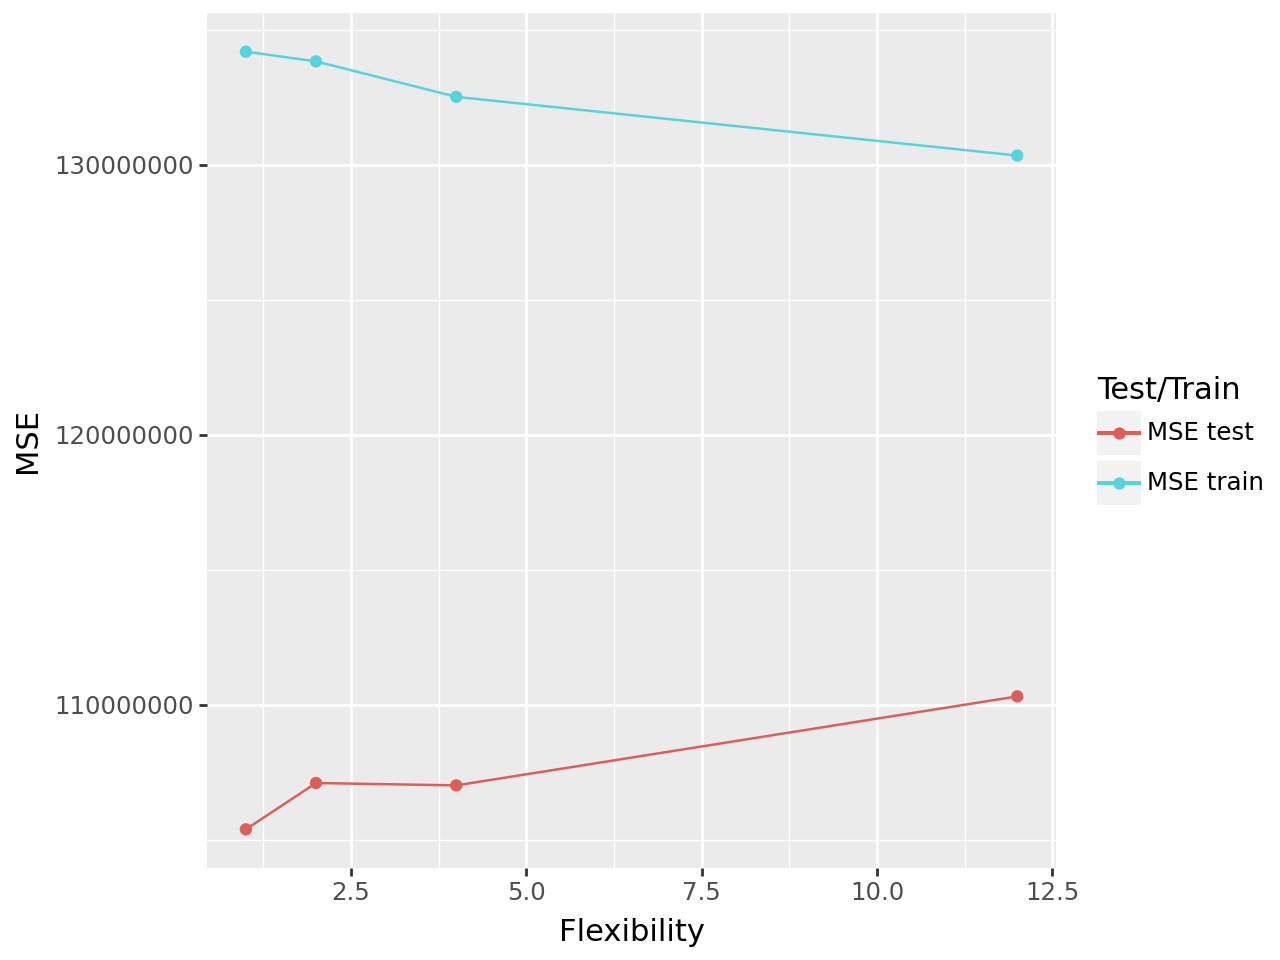

In [40]:
(ggplot(longform, aes(x = "Flexibility", y= "MSE", color = "Test/Train", group = "Test/Train")) + geom_point() + geom_line())

In [41]:
DF = pd.DataFrame({
    "Age": Data["age"],
    "y_prediction": model7.predict(X),
    "y": y
})
# DF

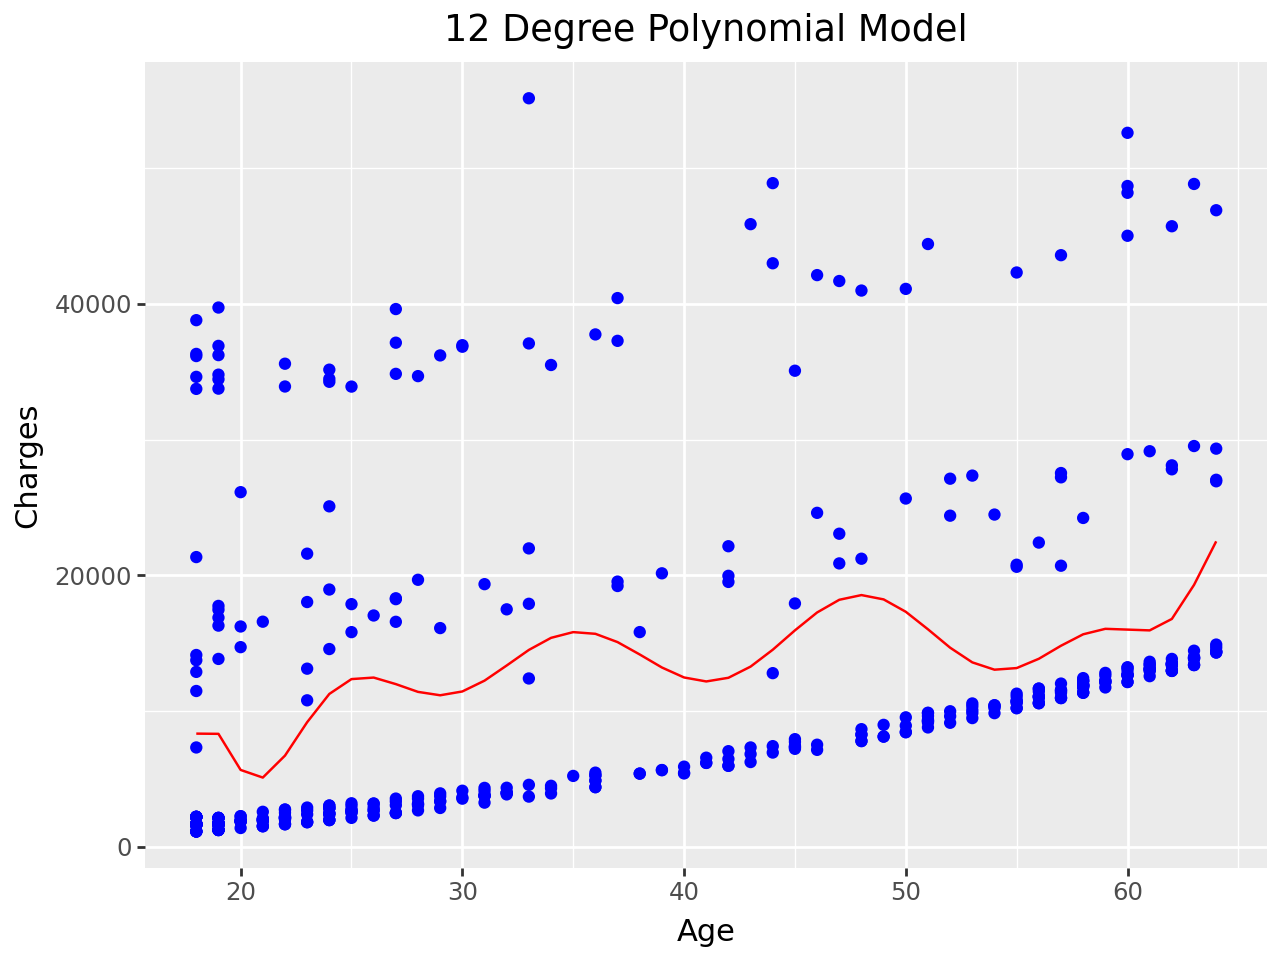

In [42]:
(ggplot(DF) +geom_point(mapping= aes(x = "Age", y = "y"), color = "blue")+ geom_line(mapping= aes(x = "Age", y = "y_prediction"), color = "red") + labs(y = "Charges", title= "12 Degree Polynomial Model"))

In [43]:
Model_fits = pd.DataFrame({"Model" : ["Simple Linear", "Second Degree", "Fourth degree", "Twelfth Degree"], "R2 Score" : [r2_1, r2_5, r2_6, r2_7], "MSE test" : [ mse_test1, mse_test5, mse_test6, mse_test7], "MSE train" : [ mse_train1, mse_train5, mse_train6, mse_train7]})

In [44]:
print(Model_fits.sort_values("R2 Score", ascending= False).head(1))

           Model  R2 Score      MSE test     MSE train
0  Simple Linear  0.146477  1.053902e+08  1.341891e+08
           Model  R2 Score      MSE test     MSE train
0  Simple Linear  0.146477  1.053902e+08  1.341891e+08


In [45]:
print(Model_fits.sort_values("MSE test", ascending= True).head(1))

           Model  R2 Score      MSE test     MSE train
0  Simple Linear  0.146477  1.053902e+08  1.341891e+08
           Model  R2 Score      MSE test     MSE train
0  Simple Linear  0.146477  1.053902e+08  1.341891e+08


According to the r2 score and MSE Test the simple linear model fits the best. I can see this because looking at the plot of the data, it seems like there is a very heavy linear pattern for most of the datapoints when age is on the x axis. The outliers above this general trend seem to create more noise and affect the higher degree models more than the simple linear model

**New Data**

In [46]:
New_data = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
# New_data

Only age as predictor ***(model 1 pipeline)***

In [47]:
X_train = Data[["age", "bmi", "smoker", "sex", "region"]]
y_train = Data["charges"]
X_test = New_data[["age", "bmi", "smoker", "sex", "region"]]
y_test = New_data["charges"]

In [48]:
model1 = model1_pipeline.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)
mse_test1 = mean_squared_error(y_test, y_pred_model1)
mse_train1 = mean_squared_error(y_train, model1.predict(X_train))
print(mse_test1, mse_train1)


136077136.50195494 126739267.91026388
136077136.50195494 126739267.91026388


Age and bmi as predictor ***(model 4 pipeline)***

In [49]:
model4 = model4_pipeline.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)
mse_test4 = mean_squared_error(y_test, y_pred_model4)
mse_train4 = mean_squared_error(y_train, model4.predict(X_train))
print(mse_test4, mse_train4)

132636406.1108129 123792439.58129103
132636406.1108129 123792439.58129103


Age, BMI and Smoker as predictors

In [51]:
#preprocessing
ct6 = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output= False, drop = "first"), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model8_pipeline = Pipeline(
    [("preprocessing", ct6),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model8 = model8_pipeline.fit(X_train, y_train)
y_pred_model8 = model8.predict(X_test)
mse_test8 = mean_squared_error(y_test, y_pred_model8)
mse_train8 = mean_squared_error(y_train, model8.predict(X_train))
print(mse_test8, mse_train8)

35377541.24141632 30812111.940652806
35377541.24141632 30812111.940652806


Age, BMI as predictors, with interaction between smokers

In [53]:
#preprocessing
ct_7 = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output= False, drop = "first"), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

# transformed = ct_7.fit_transform(X_train)


ct_8 = ColumnTransformer(
    [
      ("interaction1", PolynomialFeatures(interaction_only= True, include_bias= False), ["standardize__age", "dummify__smoker_yes"]),
      ("interaction2", PolynomialFeatures(interaction_only= True, include_bias= False), ["standardize__bmi", "dummify__smoker_yes"]),
    ],
    remainder = "passthrough"
).set_output(transform="pandas")
# ct_8.fit_transform(transformed)

ct_9 = ColumnTransformer(
    [
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age", "interaction2__standardize__bmi", "interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes"])
    ],
    remainder= "drop"
).set_output(transform = "pandas")


C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [54]:
#pipeline
model9_pipeline = Pipeline(
    [("preprocessing", ct_7),
    ("interaction", ct_8),
    ("postprocessing", ct_9),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model9 = model9_pipeline.fit(X_train, y_train)
y_pred_model9 = model9.predict(X_test)
mse_test9 = mean_squared_error(y_test, y_pred_model9)
mse_train9 = mean_squared_error(y_train, model9.predict(X_train))
print(mse_test9, mse_train9)

128511296.37352593 111749662.74746647
128511296.37352593 111749662.74746647


C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


Age, BMI, and smokers as predictors, with interaction between smokers

In [55]:
#preprocessing
ct_7 = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output= False, drop = "first"), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

# transformed = ct_7.fit_transform(X_train)


ct_10 = ColumnTransformer(
    [
      ("interaction1", PolynomialFeatures(interaction_only= True), ["standardize__age", "dummify__smoker_yes"]),
      ("interaction2", PolynomialFeatures(interaction_only= True), ["standardize__bmi", "dummify__smoker_yes"]),
    ],
    remainder = "passthrough"
).set_output(transform="pandas")
# ct_9.fit_transform(transformed)


In [56]:
#pipeline
model10_pipeline = Pipeline(
    [("preprocessing", ct_7),
    ("interaction", ct_10),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model10 = model10_pipeline.fit(X_train, y_train)
y_pred_model10 = model10.predict(X_test)
mse_test10 = mean_squared_error(y_test, y_pred_model10)
mse_train10 = mean_squared_error(y_train, model10.predict(X_train))
print(mse_test10, mse_train10)

21786256.866852574 18674284.77468444
21786256.866852574 18674284.77468444


In [57]:
New_models = pd.DataFrame({ "Model" : ["age", "age + bmi", "age + bmi + smoker", "age + bmi + smoker interaction", "age + bmi + smoker + interaction"], "MSE test" : [ mse_test1, mse_test4, mse_test8, mse_test9, mse_test10], "MSE train" : [ mse_train1, mse_train4, mse_train8, mse_train9, mse_train10]})

In [58]:
New_models.sort_values("MSE test", ascending= True)

,Model,MSE test,MSE train
4,age + bmi + smoker + interaction,2.178626e+07,1.867428e+07
2,age + bmi + smoker,3.537754e+07,3.081211e+07
3,age + bmi + smoker interaction,1.285113e+08,1.117497e+08
1,age + bmi,1.326364e+08,1.237924e+08
0,age,1.360771e+08,1.267393e+08


In [59]:
residuals = y_test - model10.predict(X_test)
model10_residuals = pd.DataFrame({"Residuals" : residuals, "Charges" : y_test})


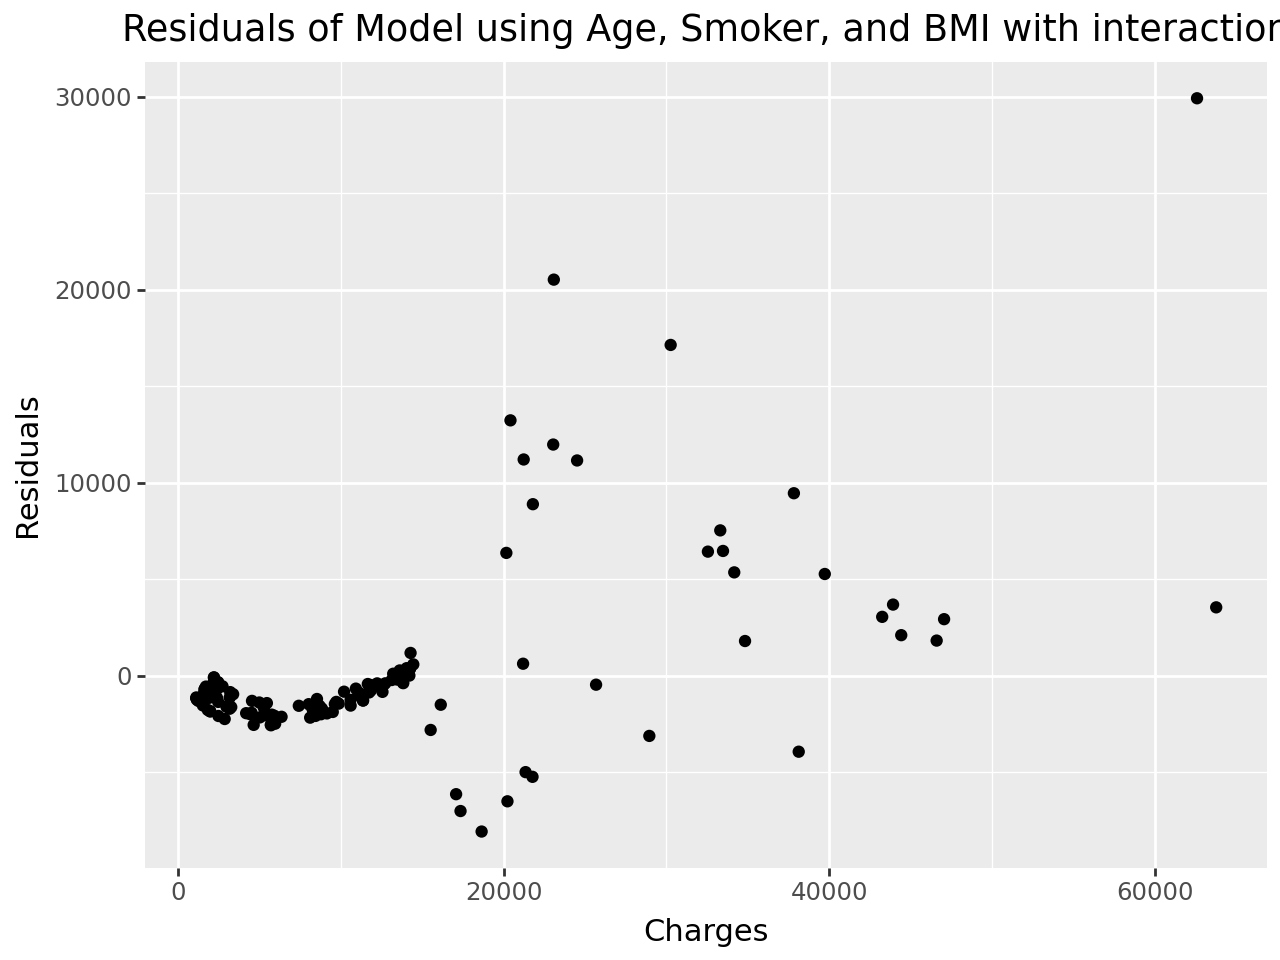

In [60]:
(ggplot(model10_residuals, aes(x = "Charges",y = "Residuals"))+ geom_point()
+ labs( title = "Residuals of Model using Age, Smoker, and BMI with interaction"))

**Finding the best model**

Using LASSO first to determine which variables are meaningful

In [61]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, drop= "first"),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
     ],
  remainder = "passthrough"
).set_output(transform= "pandas")

# ct.fit_transform(X_train)

In [89]:
# lr_pipeline_1 = Pipeline(
#   [("preprocessing", ct),
#   ("linear_regression", Lasso())]
# )

# degrees = {'linear_regression__alpha': np.logspace(-5, 2, num=8),
#  }

# gscv = GridSearchCV(lr_pipeline_1, degrees, cv = 5, scoring='r2')
# gscv_fitted = gscv.fit(X_train, y_train)
# r2_score = gscv_fitted.cv_results_['mean_test_score']
# specifications = gscv_fitted.cv_results_['params']
# best_model = pd.DataFrame(data = {"r2_score": r2_score, "specifications": specifications})
# best_model.sort_values(by = "r2_score", ascending = False)



In [63]:
lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", Lasso(alpha= 100))]
).set_output(transform= "pandas")
model1 = lr_pipeline_1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)

model1.named_steps["linear_regression"].coef_


array([23412.05751021,    -0.        ,     0.        ,    -0.        ,
          -0.        ,  3834.65632158,  1628.11642112])

In [77]:
#preprocessing, including dropping region variable completely 
ct_preprocessing= ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output= False, drop = "first"), ["smoker", "sex"]),
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

transformed = ct_preprocessing.fit_transform(X_train)
# transformed
ct_interaction = ColumnTransformer(
    [
      ("interaction1", PolynomialFeatures(interaction_only= True, include_bias= False), ["standardize__age", "dummify__smoker_yes"]),
      ("interaction2", PolynomialFeatures(interaction_only= True, include_bias= False), ["standardize__bmi", "dummify__smoker_yes"]),
      ("interaction3", PolynomialFeatures(interaction_only= True, include_bias= False), ["standardize__bmi", "standardize__age"]),
    ],
    remainder = "drop"
).set_output(transform="pandas")
# ct_interaction.fit_transform(transformed)

#post processing, getting rid of repeat variables
ct_post = ColumnTransformer(
    [
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age", "interaction1__dummify__smoker_yes", "interaction3__standardize__bmi", "interaction4__dummify__sex_male", "interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes", "interaction3__standardize__bmi standardize__age", "interaction4__standardize__age dummify__sex_male", "interaction5__standardize__bmi dummify__sex_male", "interaction6__dummify__smoker_yes dummify__sex_male"])
    ],
    remainder= "drop"
).set_output(transform = "pandas")


C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [79]:

lr_pipeline = Pipeline(
  [("preprocessing", ct_preprocessing),
  ("interaction", ct_interaction),
  ("postprocessing", ct_post),
  ("linear_regression", Lasso())]
).set_output(transform= "pandas")

params = {
  'interaction__interaction1__degree': np.arange(0, 3),
  'interaction__interaction2__degree': np.arange(0, 3),
  'interaction__interaction3__degree': np.arange(0, 3),
  'linear_regression__alpha': np.logspace(-1, 3, num=5)
 }

gscv = GridSearchCV(lr_pipeline, params, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X_train, y_train)
# r2_score = gscv_fitted.cv_results_['mean_test_score']
# specifications = gscv_fitted.cv_results_['params']
# best_model = pd.DataFrame(data = {"r2_score": r2_score, "specifications": specifications})
# best_model.sort_values(by = "r2_score", ascending = False)

C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
650 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, *

In [81]:
r2_score = gscv_fitted.cv_results_['mean_test_score']
specifications = gscv_fitted.cv_results_['params']
best_model = pd.DataFrame(data = {"r2_score": r2_score, "specifications": specifications})
best_model.sort_values(by = "r2_score", ascending = False)
best_params = gscv_fitted.best_params_
best_params


{'interaction__interaction1__degree': 2,
 'interaction__interaction2__degree': 2,
 'interaction__interaction3__degree': 2,
 'linear_regression__alpha': 10.0}

In [83]:
ct_interactionfinal = ColumnTransformer(
    [
      ("interaction1", PolynomialFeatures(degree = 2, interaction_only= True, include_bias= False), ["standardize__age", "dummify__smoker_yes"]),
      ("interaction2", PolynomialFeatures(degree = 2, interaction_only= True, include_bias= False), ["standardize__bmi", "dummify__smoker_yes"]),
      ("interaction3", PolynomialFeatures(degree = 2, interaction_only= True, include_bias= False), ["standardize__bmi", "standardize__age"]),
    ],
    remainder = "drop"
).set_output(transform="pandas")

In [87]:

lr_pipeline_final = Pipeline(
  [("preprocessing", ct_preprocessing),
  ("interaction", ct_interactionfinal),
  ("postprocessing", ct_post),
  ("linear_regression", Lasso(10))]
).set_output(transform= "pandas")

final_model = lr_pipeline_final.fit(X_train, y_train)
y_pred_final_model = final_model.predict(X_test)

model.named_steps["linear_regression"].coef_

C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


array([ 4.19386511e+03,  2.40497511e+04,  3.62798185e+01, -1.29592326e+02,
        8.98494795e+03,  7.71654554e+00])

In [88]:
final_residuals = y_test - y_pred_final_model
final_residuals = pd.DataFrame({"Residuals" : residuals, "Charges" : y_test})

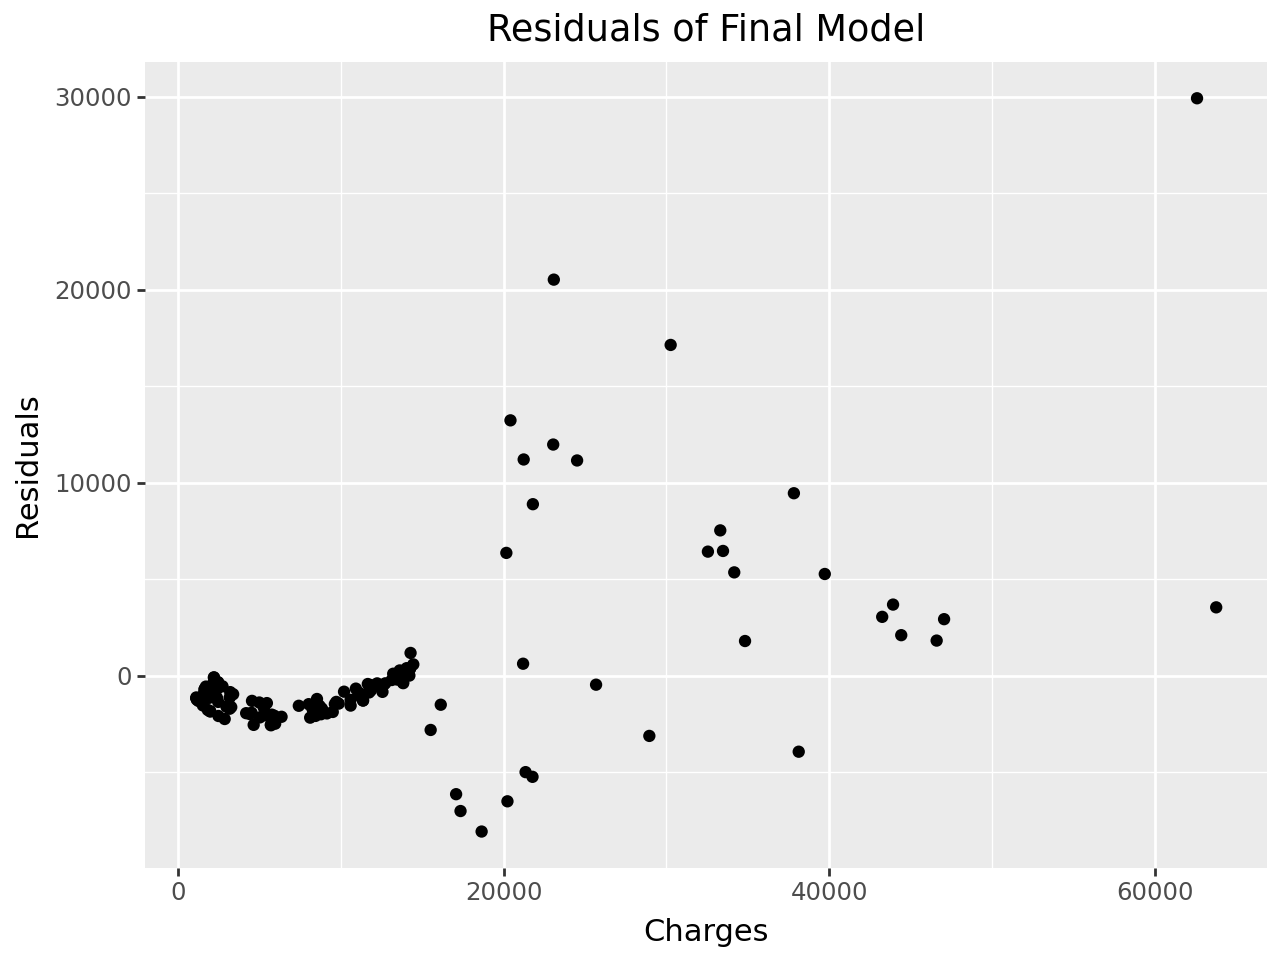

In [92]:
(ggplot(final_residuals, aes(x = "Charges",y = "Residuals"))+ geom_point()
+ labs( title = "Residuals of Final Model"))